# Proyecto #13 Gimansios Model Fitness

## Objetivos

* Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
* Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
* Analizar los factores que más impactan la pérdida.
* Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
* identificar a los grupos objetivo;
* sugerir medidas para reducir la rotación;
* describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

## Plan de Acción para procesamiento de Datos
* Diagnóstico inicial de los datos, tipo de datos, cantidad de valores, valores nulos, duplicados, etc.
* Tipo de información contenida en el dataset, aunque tengamos una descripción del tipo de información de cada columna es importante comprenderla y de ser necesario generar información a detalle generada de la que tenemos actualmente.
* Ajuste de nombres para que sean más sencillos de comprender de la mano con un formato fácil de codificar
* Si es necesario, cambiar el tipo de datos para desglosar mejor la información

## Plan de Actividades a Desarrollar para cumplimiento de objetivos
* Análisis exploratorio de los datos
* Gráficos para apoyo visual como histogramas y mapas de calor
* Analizar la correlación entre la variable objetivo y las características
* Selección de modelos para predecir cancelación con base a datos
* Agrupamiento por clústeres
* Conclusiones

## 1.0 Descarga de datos y librerías

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [82]:
df = pd.read_csv('gym_churn_us.csv')

In [83]:
print(df.shape)
print(df.head(10))
df.info()

(4000, 14)
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   
5       1              1        0              0      1                1   
6       1              1        1              1      0                6   
7       0              1        0              0      1                1   
8       1              1        1              1      1                1   
9       0              1        0              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0  

* Nuestro Dataset está compuesto por 14 columnas y 4000 entradas
* No tenemos valores ausentes o nulos
* No tenemos nigún tipo de dato objeto, todos fueron reemplazados por codificación de 0 y 1, tenemos que investigar de que manera están asignadas las clasificaciones
* Ya que los contratos están en meses, cambiaremos la columna Month_to_end_contract a entero
* Modificaremos los nombres de las columnas a formato snake case
* Revisaremos si tenemos usuarios duplicados


* Cambio de columnas a formato snake_case y cambio de columna 'month_to_end_contract' a entero

In [84]:
df.columns = df.columns.str.lower()
df['month_to_end_contract'] = df['month_to_end_contract'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

* Buscamos líneas duplicadas

In [85]:
df.duplicated().sum()

np.int64(0)

## 2.0 Análisis Exploratorio de Datos

In [86]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Observaciones**
* Podemos notar que la cantidad de valores de género están casi equilibrados, hay una diferencia del 1%.
* La edad promedio de nuestros datos es de 29 años y oscilan entre 18 y 41 años.
* También tenemos que el 50% de los usuarios tienen contratos por al 1 mes, siendo este el más atractivo, el contrato por un periodo de 3 meses no es tan atractivo y las opciones de 6 y 12 meses parecen ser las más atrayentes después del periodo de 1 mes.
* La mayoría de los usuarios vive en las cercanías del gimnasio, al menos el 75% de los usuarios confirmados.
* También tenemos que cerca del 49% de los usuarios son asociados de empresas con beneficios
* El 90% de los usuarios comparte su número de teléfono
* La promo amigos no es tan atractiva, tal vez pensar en un beneficio diferente para los referidos
* La cancelación para el mes en cuestión es del 75%, la pérdida de clientes es muy alta, analizaremos nuestros datos para asegurar la retención de clientes o conocer la causa de pérdida de clientes

In [87]:
churn = df.groupby('churn').mean().reset_index()
churn

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


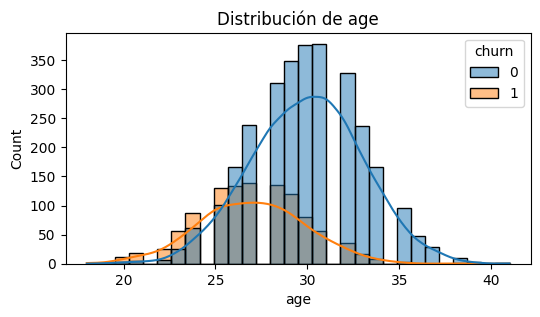

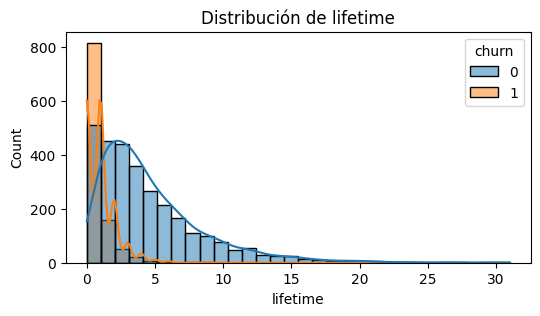

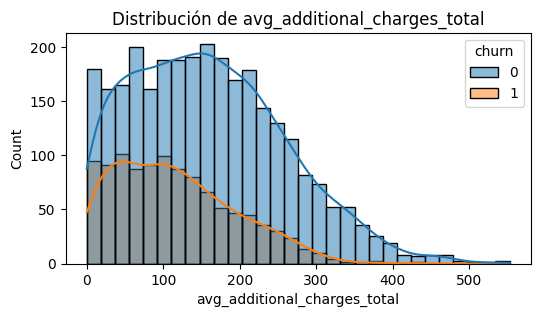

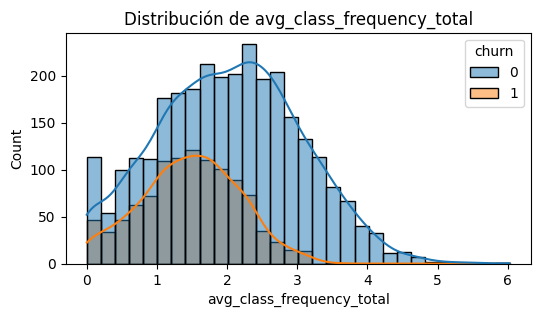

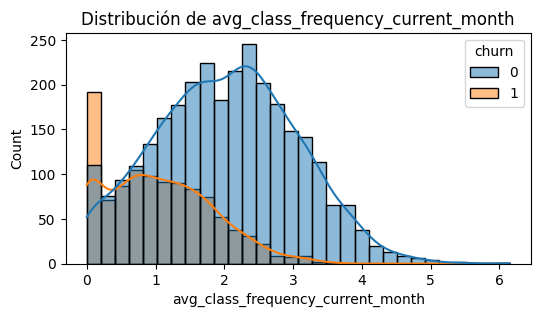

In [88]:
columns_to_plot = ['age', 'lifetime', 'avg_additional_charges_total', 
                   'avg_class_frequency_total', 'avg_class_frequency_current_month']

for col in columns_to_plot:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='churn', kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()

In [89]:
df[df['churn'] == 0]['contract_period'].value_counts().sort_index()

contract_period
1     1273
6      729
12     937
Name: count, dtype: int64

In [90]:
df[df['churn'] == 1]['contract_period'].value_counts().sort_index()

contract_period
1     934
6     104
12     23
Name: count, dtype: int64

**Observaciones de Gráficos de Dispersión**
1. La edad promedio para clientes activos es de 27 y 31 para los que están por cancelar
2. El plan con mayor contratación es el mensual, esto puede ser debido a la contancia que quieren mantener los usuarios y no quieren gastar aquellos meses que de momento no saben si utilizarán
3. Los clientes que están por cancelar tienen más adquisición para contratos de 6 y 12 meses, puede ser por algún precio especial o promoción pero por algún motivo están por cancelar, puede ser servicio, limpieza, sanitarios, servicios extras, máquinas con falta de mantenimiento o que no se tenga la capacidad para recibir a tantas personas
4. La distancia no es un factor predominante en la cancelación de los clientes, pero ser asociado con beneficios corporativos si lo es, puede ser una prestación que la empresa otorgue a los empleados por un periodo en especial para incitar a sus trabajadores a cuidar su salud y posterior lo quitaran o que los mismos empleados renunciaran, resultando en la cancelación 
5. El ciclo de vida de los cliente que están por cancelar es mayor, puede ser que con el paso de los meses fueron detectando desperfectos, perdieron motivación o simplemente dejaron de ir, podemos pensar que antes de ser clientes que están por cancelar fueron clientes activos y después se pasaron al grupo de clientes por cancelar
6. los clientes que están por cancelar, con un mayor ciclo de vida en el gimnasio han gastado más en servicios adicionales, puede ser por confianza de los productos o para tener un mejor rendimiento en sus entrenamientos

**Matriz de Correlación**

In [91]:
mc = df.corr()

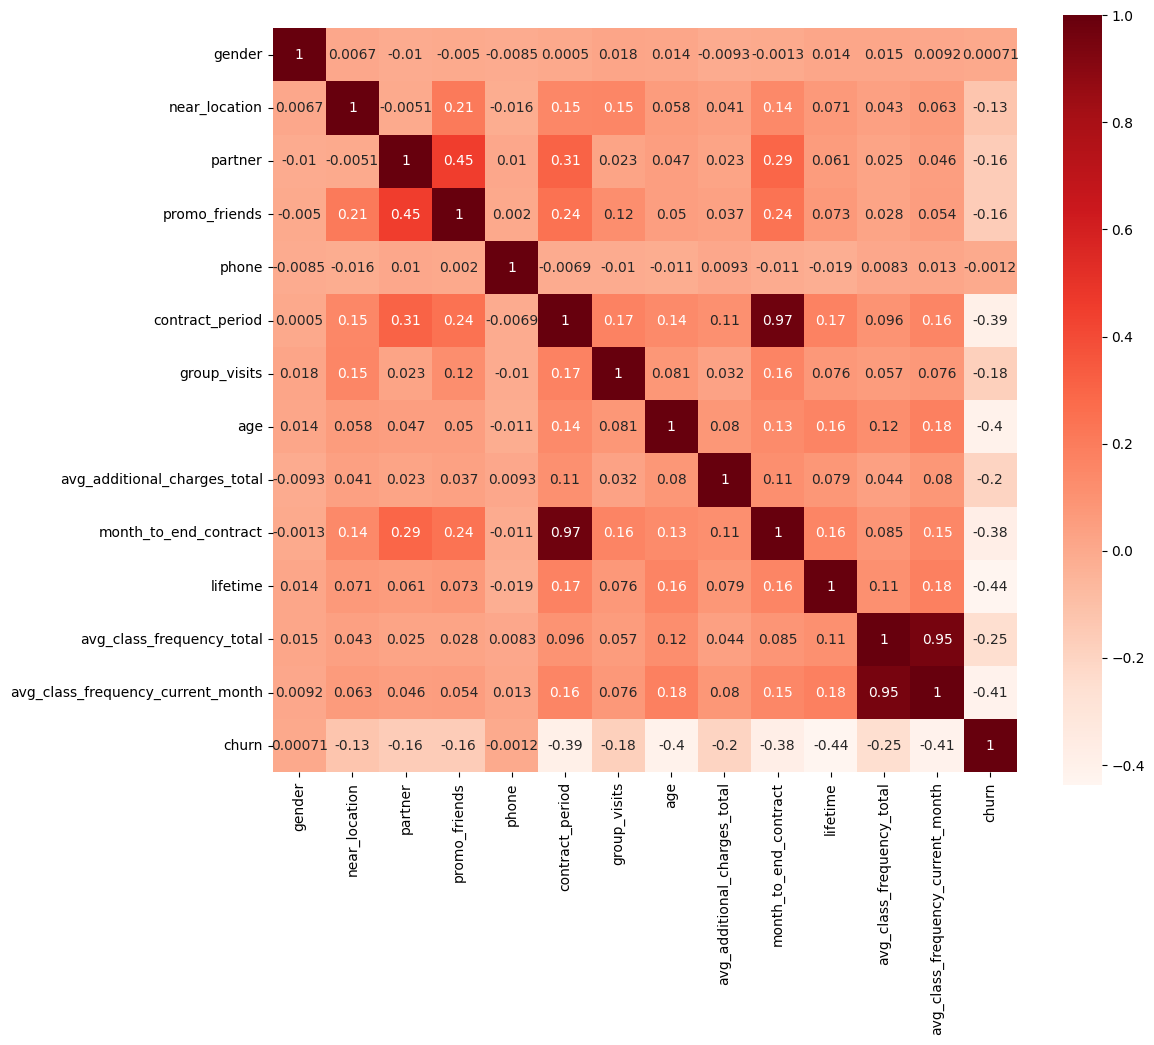

In [92]:
plt.figure(figsize= (12,10))

sns.heatmap(mc, annot = True, square= True, cmap = 'Reds')

plt.show()

* Podemos observar una fuerte correlación entre el mes de termino del contrato con el periodo de contrato adquirido.
* De igual manera una fuerte correlación entre la cantidad de frecuencia media de visitas por semana durante el ciclo de vida del cliente y durante el mes en curso.

## 3.0 Modelo de predicción para la cancelación de usuarios

In [93]:
#Definimos la matriz de características y la variable objetivo y
X = df.drop('churn', axis = 1)
y = df['churn']

In [94]:
#Dividimos entre datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0) #Dividiremos nuestros datos 80 Entrenamiento y 20 Prueba

In [95]:
# Define los modelos a trabajar Regresión Logística
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

c:\Users\emili\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [96]:
lr_pred = lr_model.predict(X_test)

In [97]:
# Exactitud, presición y Recall
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, lr_pred)))
print('Precisión: {:.2f}'.format(precision_score(y_test, lr_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_pred)))


Exactitud: 0.91
Precisión: 0.83
Recall: 0.81


In [98]:
# Modelo Bosque Aleatorio
rf_model = RandomForestClassifier(random_state= 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print('Exactitud: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precisión: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))


Exactitud: 0.92
Precisión: 0.84
Recall: 0.82


Tenemos un resultado ligeramente mejor con el modelo de Bosque Aleatorio, sin embargo, no se descartan los buenos resultados obtenidos de la regresión Linear.

## 4.0 Creación de Clústeres de Usuarios

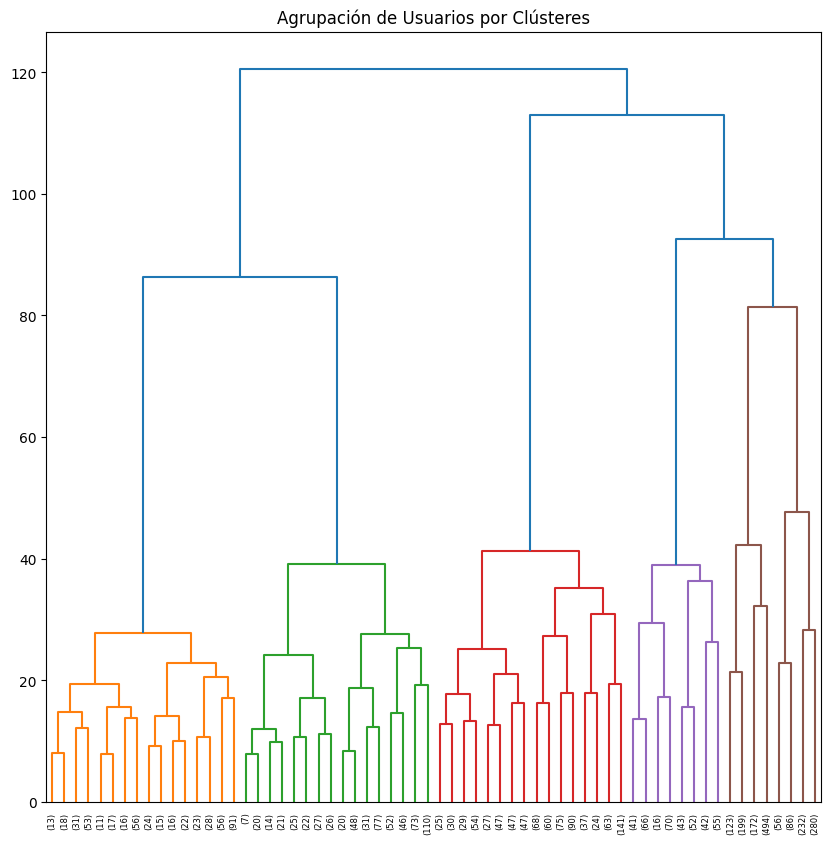

In [ ]:
# Estandarizamos los datos

df_ = df.drop('churn', axis = 1)
sc = StandardScaler()
X_sc = sc.fit_transform(df_)

#Trazamos dendograma
linked = linkage(X_sc, method= 'ward')

plt.figure(figsize = (10,10))
dendrogram(linked, orientation= 'top', truncate_mode= 'level', p = 5)
plt.title('Agrupación de Usuarios por Clústeres') 

plt.show()


In [113]:
#Define el modelo con 5 clústeres
km = KMeans(n_clusters= 5, random_state=0)
labels = km.fit_predict(X_sc)

df['cluster_km'] = labels

df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.486819,1.000000,0.243409,0.007030,0.899824,1.978910,0.326889,28.239016,130.877033,1.896309,2.477153,1.318003,1.083831,0.513181
1,0.592493,0.970509,0.288204,0.123324,0.898123,2.898123,0.482574,30.339142,164.193829,2.654155,5.219839,2.937411,2.944131,0.054960
2,0.499469,0.943677,0.740701,0.489904,0.900106,11.866100,0.551541,29.905420,165.146492,10.852285,4.737513,1.989423,1.980764,0.022317
3,0.483360,1.000000,0.798732,1.000000,0.911252,3.079239,0.445325,29.052298,139.858265,2.873217,3.510301,1.665722,1.547717,0.269414
4,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870,0.450368


In [122]:
df.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.513181
1    0.054960
2    0.022317
3    0.269414
4    0.450368
Name: churn, dtype: float64

# 5.0 Conclusiones
1. La cancelación de los clientes va en relación a su ciclo de vida, mientras mayor sea el tiempo la pérdida de clientes será más notoria
2. Tomando en cuenta que el paquete con mayor demanda es el de 1 mes, pudiéramos incrementar el precio por mensualidad y bajar los precios mientras mayor sea la temporalidad del contrato
3. Revisar que las instalaciones se encuentren en buenas condiciones y con la capacidad de atender a todos los usuarios, mantenimientos de máquinas sean fuera de horario, o en los días y hrs con menor demanda, por ejemplo, medio día y 11:00 am.
4. El modelo que arroja mejores resultados es el de Bosques Aleatorios, si bien la diferencia es mínima, los datos obtenidos son más precisos.
5. En los clústeres tenemos grupos con alta probabilidad de Cancelación pero también clientes con cancelación del 2%, pudiéramos analizarlos a fondo o revisar con los mismos usuarios en encuestas el motivo de cancelación.